# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [1]:
import pandas as pd

df_flights = pd.read_csv('flights.csv')
columns = list(df_flights)
df_flights.head()


,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

In [2]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271940 entries, 0 to 271939
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               271940 non-null  int64  
 1   Month              271940 non-null  int64  
 2   DayofMonth         271940 non-null  int64  
 3   DayOfWeek          271940 non-null  int64  
 4   Carrier            271940 non-null  object 
 5   OriginAirportID    271940 non-null  int64  
 6   OriginAirportName  271940 non-null  object 
 7   OriginCity         271940 non-null  object 
 8   OriginState        271940 non-null  object 
 9   DestAirportID      271940 non-null  int64  
 10  DestAirportName    271940 non-null  object 
 11  DestCity           271940 non-null  object 
 12  DestState          271940 non-null  object 
 13  CRSDepTime         271940 non-null  int64  
 14  DepDelay           271940 non-null  int64  
 15  DepDel15           269179 non-null  float64
 16  CR

## Where are NaNs

In [3]:
# Your code to explore the data
df_flights.isna().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

How other data related to delay looks for NaNs in DepDel15?

In [4]:
delay_related = ["DepDelay","DepDel15","ArrDelay","ArrDel15","Cancelled"]
df_flights[df_flights["DepDel15"].isnull()][delay_related]

,DepDelay,DepDel15,ArrDelay,ArrDel15,Cancelled
171,0,NaN,0,1,1
359,0,NaN,0,1,1
429,0,NaN,0,1,1
545,0,NaN,0,1,1
554,0,NaN,0,1,1
...,...,...,...,...,...
271410,0,NaN,0,1,1
271607,0,NaN,0,1,1
271634,0,NaN,0,1,1
271671,0,NaN,0,1,1


How **Cancelled** column relates to this NaNs?

In [5]:
canceled_flights = df_flights["Cancelled"]==1
print(f"Number of cancelled flights is {canceled_flights.sum()}")
nan_DepDel15 = df_flights["DepDel15"].isnull()
nans_in_canceled = df_flights[canceled_flights & nan_DepDel15].shape[0]
print(f'Number of NaNs in "DepDel15" within cancelled flight {nans_in_canceled}')

Number of cancelled flights is 2916
Number of NaNs in "DepDel15" within cancelled flight 2761


This means that all NaNs are within the cancelled flights.

Let's see how delay-related fields look for fields that do not have NaNs.

In [6]:
df_flights[canceled_flights & (~nan_DepDel15)][delay_related]

,DepDelay,DepDel15,ArrDelay,ArrDel15,Cancelled
145,1,0.0,0,1,1
638,245,1.0,0,1,1
1246,-2,0.0,0,1,1
3277,49,1.0,0,1,1
3367,80,1.0,0,1,1
...,...,...,...,...,...
262398,-8,0.0,0,1,1
263351,-1,0.0,0,1,1
264016,35,1.0,0,1,1
269165,159,1.0,0,1,1


Weird... it seems that some of this flight departed but never arrived.

Let's see if all of them have **ArrDelay**=0 and **ArrDel15**=1.

In [7]:
ArrDelay_0 = df_flights["ArrDelay"] == 0
ArrDel15_1 = df_flights["ArrDel15"] == 1
num_cancelled_query = df_flights[canceled_flights & (~nan_DepDel15) & ArrDel15_1 & ArrDelay_0].shape[0]
print(f"Number of cancelled flights that are recorded as if they have never arrived is {num_cancelled_query}")

Number of cancelled flights that are recorded as if they have never arrived is 155


### I guess it is ok to replace NaNs with 0 - they probably never left

In [8]:
df_flights["DepDel15"] = df_flights["DepDel15"].fillna(0)
df_flights.isna().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

## Let's look for outliers

In [9]:
from matplotlib import pyplot as plt

# Create a function that we can re-use
def show_distribution(var_data):
    '''
    This function will make a distribution (graph) and display it
    '''

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print(f'Minimum:{min_val:.2f}\n' +
          f'Mean:{mean_val:.2f}\n' +
          f'Median:{med_val:.2f}\n' +
          f'Mode:{mod_val:.2f}\n' +
          f'Maximum:{max_val:.2f}\n')
    
    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel(var_data.name)

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    plt.show()

Minimum:-63.00
Mean:10.35
Median:-1.00
Mode:-3.00
Maximum:1425.00



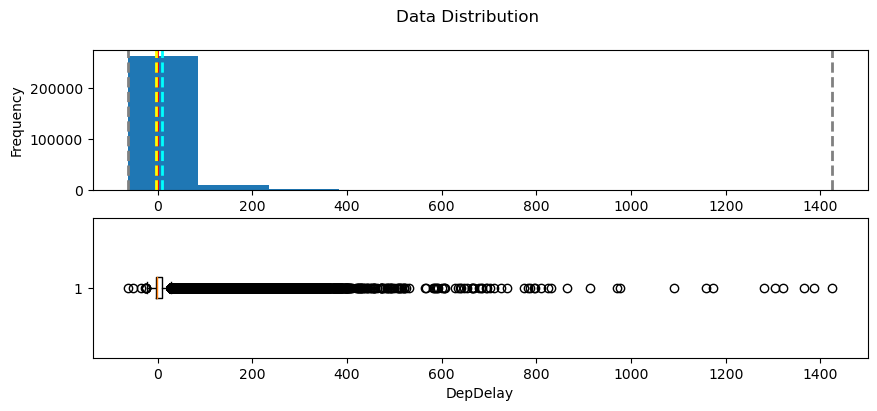

In [10]:
show_distribution(df_flights["DepDelay"])

It seems that there are some outlier with unusually high delays

Let's see how this data looks without outliers

Without outliers we have 241652 records
Minimum:-11.00
Mean:1.49
Median:-1.00
Mode:-3.00
Maximum:36.00



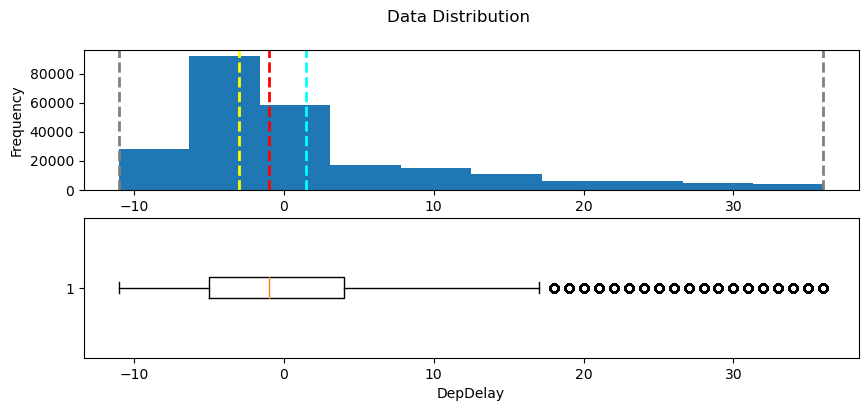

In [11]:
q_low = df_flights["DepDelay"].quantile(0.01)
q_high = df_flights["DepDelay"].quantile(0.90)
df_wo_outliers = df_flights.query(f"DepDelay > {q_low} and DepDelay < {q_high}")
print(f"Without outliers we have {df_wo_outliers.shape[0]} records")
show_distribution(df_wo_outliers["DepDelay"])

It looks good ok fine. Flights do not depart 2 hours before scheduled time but it might happen that they are delay that much.

Let's remove the outliers

In [12]:
df_flights = df_wo_outliers

And the same for arrival delay

Minimum:-75.00
Mean:-2.50
Median:-4.00
Mode:0.00
Maximum:186.00



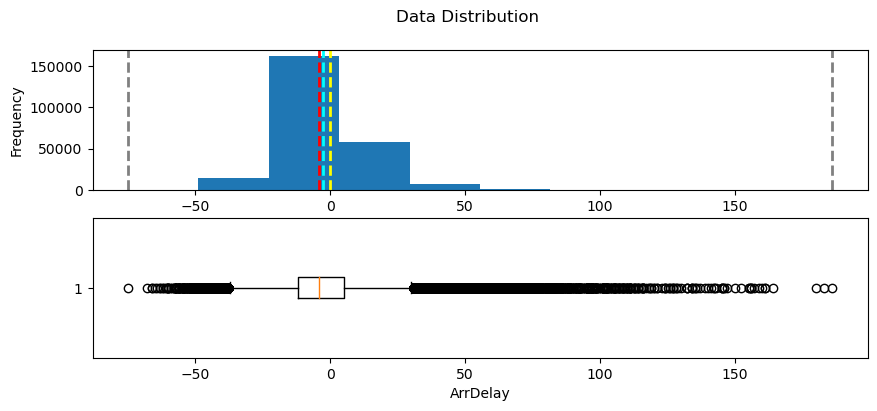

In [13]:
show_distribution(df_flights["ArrDelay"])

Without outliers we have 236501 records
Minimum:-32.00
Mean:-2.79
Median:-4.00
Mode:0.00
Maximum:44.00



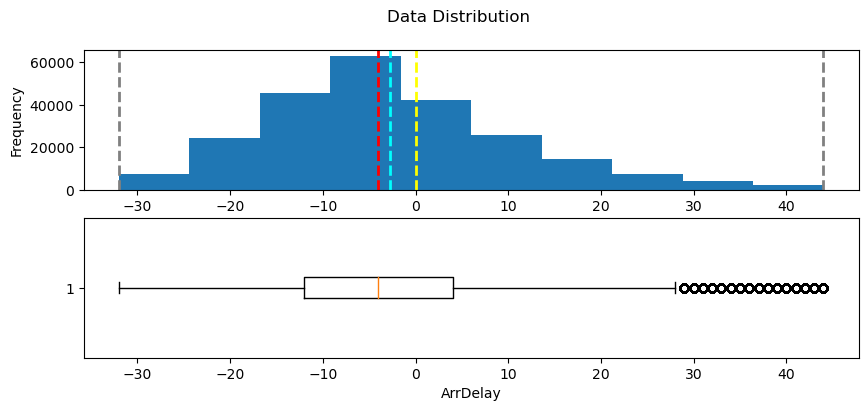

In [14]:
q_low = df_flights["ArrDelay"].quantile(0.01)
q_high = df_flights["ArrDelay"].quantile(0.99)
df_wo_outliers = df_flights.query(f"ArrDelay > {q_low} and ArrDelay < {q_high}")
print(f"Without outliers we have {df_wo_outliers.shape[0]} records")
show_distribution(df_wo_outliers["ArrDelay"])

In [15]:
df_flights = df_wo_outliers

## Explore data

Statistics

In [16]:
df_flights[["DepDelay","ArrDelay"]].describe()

,DepDelay,ArrDelay
count,236501.000000,236501.000000
mean,1.408480,-2.788868
std,9.302696,13.421149
min,-11.000000,-32.000000
25%,-4.000000,-12.000000
50%,-1.000000,-4.000000
75%,4.000000,4.000000
max,36.000000,44.000000


Approximate PDFs

<Axes: ylabel='Density'>

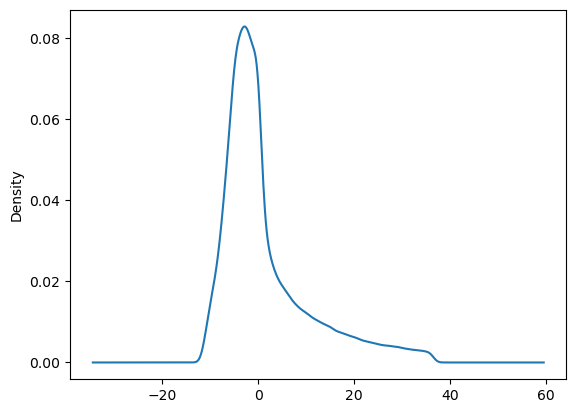

In [17]:
df_flights["DepDelay"].plot.density()

<Axes: ylabel='Density'>

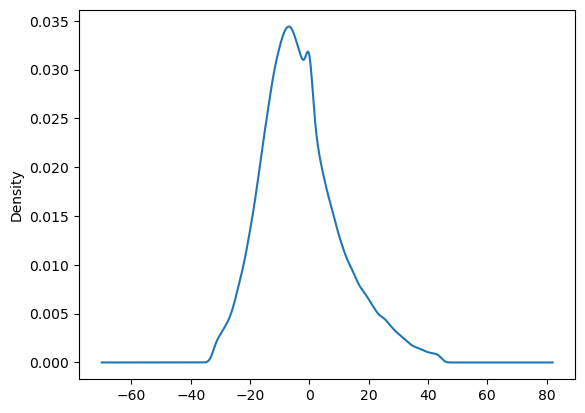

In [18]:
df_flights["ArrDelay"].plot.density()

Arrival delay by Carrier

<Axes: title={'center': 'ArrDelay'}, xlabel='Carrier'>

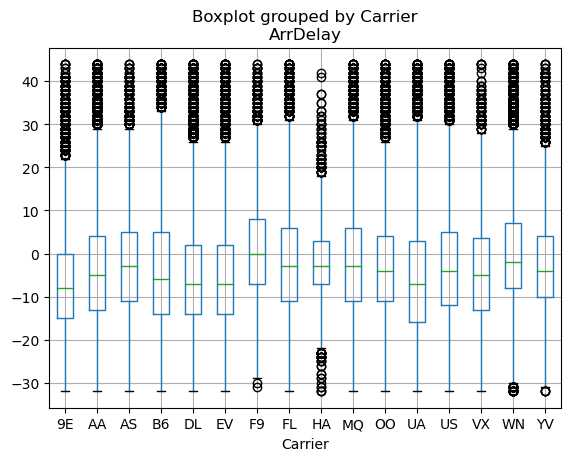

In [19]:
df_flights.boxplot(column = "ArrDelay", by = "Carrier")

Arrival delay by day of week

<Axes: title={'center': 'ArrDelay'}, xlabel='DayOfWeek'>

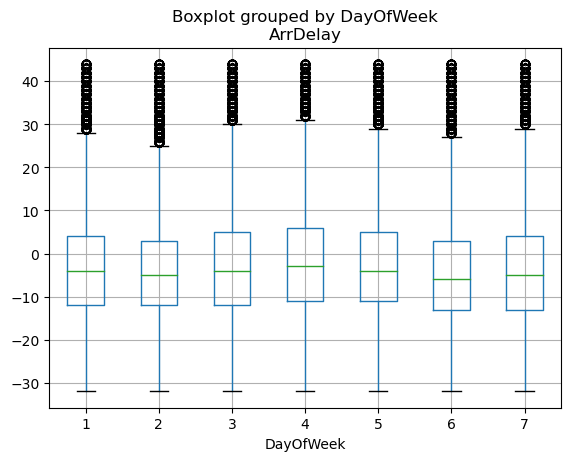

In [20]:
df_flights.boxplot(column = "ArrDelay", by = "DayOfWeek")

Average departure delay by Airport

<function matplotlib.pyplot.show(close=None, block=None)>

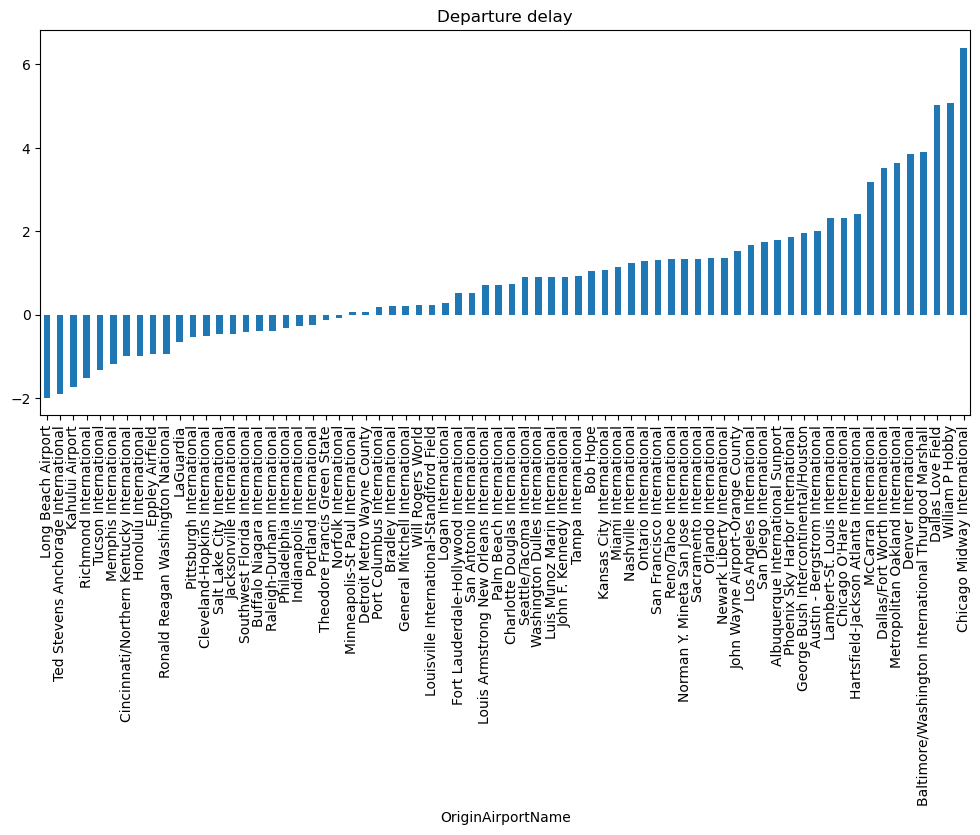

In [46]:
mean_DepDelay_by_Airport = df_flights.groupby(['OriginAirportName'])["DepDelay"].mean().sort_values()
fig = plt.figure()
mean_DepDelay_by_Airport.plot(kind = "bar", figsize= (12,5))
plt.title("Departure delay")
plt.show

Do **late** departures (DepDel15 == 1) result in longer arrival delays than on-time departures?

Minimum:-32.00
Mean:16.96
Median:17.00
Mode:18.00
Maximum:44.00



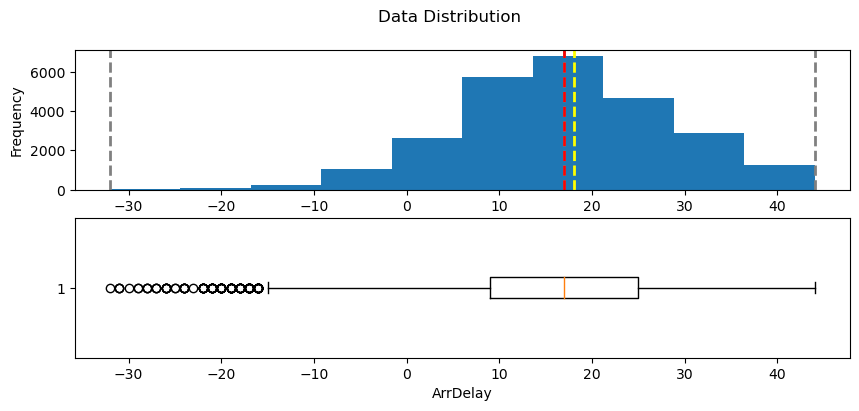

In [53]:
show_distribution(df_flights.query("DepDel15 == 1 and Cancelled == 0")["ArrDelay"])

Minimum:-32.00
Mean:-5.23
Median:-6.00
Mode:-7.00
Maximum:44.00



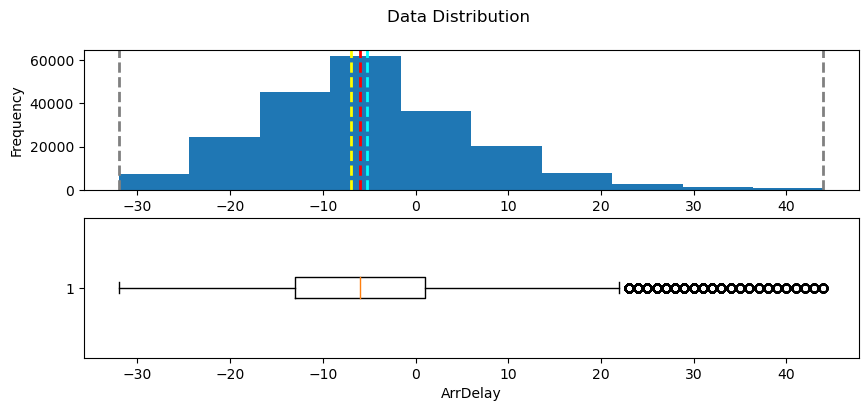

In [54]:
show_distribution(df_flights.query("DepDel15 == 0 and Cancelled == 0")["ArrDelay"])

Which route has most **late** arrivals?

In [67]:
routes = df_flights.groupby(["OriginAirportName","DestAirportName"])
print(routes["ArrDel15"].sum().sort_values(ascending = False))

OriginAirportName            DestAirportName                         
San Francisco International  Los Angeles International                   149
Los Angeles International    San Francisco International                 134
McCarran International       Los Angeles International                    96
LaGuardia                    Hartsfield-Jackson Atlanta International     93
Los Angeles International    McCarran International                       83
                                                                        ... 
Norfolk International        Miami International                           0
San Francisco International  Cleveland-Hopkins International               0
Norfolk International        LaGuardia                                     0
San Francisco International  General Mitchell International                0
Logan International          Austin - Bergstrom International              0
Name: ArrDel15, Length: 2482, dtype: int64


Which route has highest average arrival delay?

In [68]:
print(routes["ArrDelay"].mean().sort_values(ascending= False))

OriginAirportName                          DestAirportName                  
Southwest Florida International            Theodore Francis Green State         44.000000
Louis Armstrong New Orleans International  Ronald Reagan Washington National    25.333333
Cleveland-Hopkins International            Palm Beach International             18.000000
                                           Philadelphia International           17.500000
Denver International                       Raleigh-Durham International         14.153846
                                                                                  ...    
Jacksonville International                 Chicago Midway International        -20.000000
Lambert-St. Louis International            Cleveland-Hopkins International     -20.000000
Eppley Airfield                            LaGuardia                           -20.750000
Denver International                       Kahului Airport                     -22.666667
Indianapolis Internatio